In [30]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

data=np.loadtxt('data.txt',delimiter=',')

m=np.shape(data)[0]

Text(0.5, 1.0, 'Variation of profit with population')

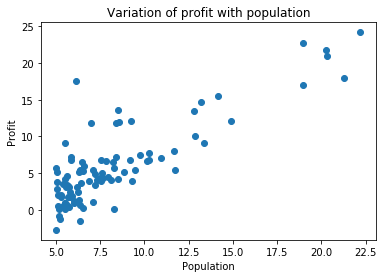

In [14]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Variation of profit with population')

In [15]:
 data=np.delete(data,0,axis=0) #removing outlier

Text(0.5, 1.0, 'Variation of profit with population')

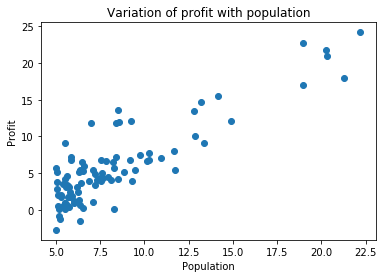

In [16]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Variation of profit with population')

The linear relation is quite strong and corelation between the 2 variable is positive.

In [17]:
def Compute_cost(X,y,theta):
    m=np.shape(data)[0]
    J=np.dot(np.matmul(X,(theta))-y,np.matmul(X,(theta))-y)/(2*m)
    theta_grad=np.transpose(np.matmul(np.transpose(np.matmul(X,(theta))-y),X)/m)
    return J,theta_grad

In [18]:
def gradientDescent(X,y,theta,alpha,iterations):
    J=np.array([])
    a=np.array([])
    for i in range(0,iterations):
        a=np.append(a,i)
        _,theta_grad=Compute_cost(X,y,theta)
        theta=theta-alpha*theta_grad
        J=np.append(J, Compute_cost(X,y,theta)[0])
        
    return theta,J,a  

In [19]:
m=np.shape(data)[0]
i=np.ones((m,1),dtype=int)
X=np.concatenate((i,data[:,0].reshape(m,1)),axis=1)
#X[:,1]=(X[:,1]-np.mean(X[:,1]))/np.std(X[:,1])#feature normalisation
y=data[:,1]

In [20]:
Compute_cost(X,y,[0,0])[0]#compute cost before optimisation

30.79495785534583

3.459581903158005
[-4.21150394  1.21354725]


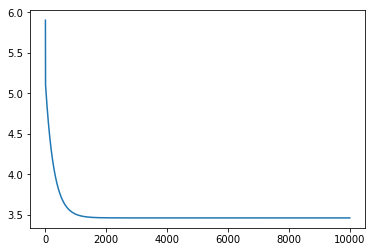

In [21]:
theta=gradientDescent(X,y,[0,0],0.01,10000)[0]
print(Compute_cost(X,y,theta)[0])
print(theta)
plt.plot(gradientDescent(X,y,[0,0],0.01,10000)[2],gradientDescent(X,y,[0,0],0.01,10000)[1])

In [22]:
theta

array([-4.21150394,  1.21354725])

In [23]:
(Compute_cost(X,y,theta)[0])#costfunction after optimisation

3.459581903158005

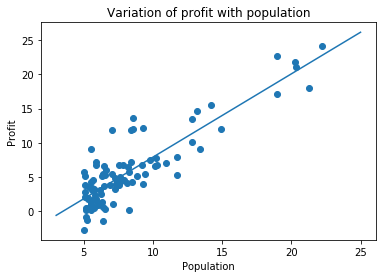

In [190]:
a=np.linspace(3,25)
b=theta[0]+theta[1]*a
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Variation of profit with population')
plt.plot(a,b)

In [24]:
theta

array([-4.21150394,  1.21354725])

In [25]:
x35000=[1,35000]
profit35000=np.dot(x35000,theta)

In [26]:
profit35000

42469.94217046778

In [28]:
x70000=[1,70000]
profit70000=np.dot(x70000,theta)

In [29]:
profit70000

84944.0958448804

In [32]:
reg = LinearRegression().fit(X, y)

In [33]:
reg.predict(np.array([[1, 35000]]))

array([42469.94238279])

In [34]:
reg.predict(np.array([[1, 70000]]))

array([84944.09626958])

The values predicted by gradient descent and sklearn are equal.